In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import zscore


In [4]:
df = pd.read_csv("/kaggle/input/prison-population-in-the-us/admissions_releases_states.csv")

In [5]:
df

,date,admissions_total,admissions_white,admissions_black,admissions_hispanic,admissions_amerind,admissions_asian,admissions_other,releases_total,releases_white,releases_black,releases_hispanic,releases_amerind,releases_asian,releases_other,state
0,2015-02-01,1583,600,193,633.0,130.0,6.0,21.0,1649,653,194,688.0,85.0,7.0,22.0,Arizona
1,2015-03-01,1580,615,189,640.0,114.0,3.0,19.0,1559,644,169,610.0,111.0,6.0,19.0,Arizona
2,2015-04-01,1779,706,235,701.0,115.0,4.0,18.0,1693,703,206,657.0,93.0,5.0,29.0,Arizona
3,2015-05-01,1821,730,260,669.0,125.0,8.0,29.0,1659,685,193,616.0,136.0,3.0,26.0,Arizona
4,2015-06-01,1689,704,215,618.0,129.0,0.0,23.0,1570,651,174,603.0,111.0,7.0,24.0,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,2022-03-01,3475,812,746,1753.0,0.0,0.0,164.0,3018,669,785,1395.0,0.0,0.0,169.0,California
1910,2022-04-01,3126,770,701,1490.0,0.0,0.0,165.0,2585,571,631,1239.0,0.0,0.0,144.0,California
1911,2022-05-01,3221,851,699,1479.0,0.0,0.0,192.0,2673,647,633,1252.0,0.0,0.0,141.0,California
1912,2022-06-01,2624,611,576,1290.0,0.0,0.0,147.0,2590,646,560,1231.0,0.0,0.0,153.0,California


In [6]:
df.isnull().sum()

date                   0
admissions_total       0
admissions_white       0
admissions_black       0
admissions_hispanic    0
admissions_amerind     0
admissions_asian       0
admissions_other       0
releases_total         0
releases_white         0
releases_black         0
releases_hispanic      0
releases_amerind       0
releases_asian         0
releases_other         0
state                  0
dtype: int64

Bütün sütunların dolu olduğunu görüyoruz. Bu yüzden boş değerleri doldurma ve silme işlemlerini uygulamıyoruz.

In [7]:
df = pd.DataFrame(df)

In [8]:
df.columns

Index(['date', 'admissions_total', 'admissions_white', 'admissions_black',
       'admissions_hispanic', 'admissions_amerind', 'admissions_asian',
       'admissions_other', 'releases_total', 'releases_white',
       'releases_black', 'releases_hispanic', 'releases_amerind',
       'releases_asian', 'releases_other', 'state'],
      dtype='object')

In [9]:
select_header=["date","admissions_total","admissions_white","admissions_black","releases_total","releases_white","releases_black"]


In [10]:
df=df[select_header]

In [11]:
import seaborn as sns

Aykırı değer analizi gerçekleştirerek, ortalama değeri etkileyen uç noktalar hariç tutulacak ve bu sayede daha güvenilir ve doğru analiz sonuçları elde edilecektir.

**Interquartile Range Çeyrekler Arası Aralık Analizi**

In [12]:
df_aykiri=df.drop(columns=["date"])


In [13]:
df_aykiri = pd.DataFrame(df_aykiri)


Veri setimizde negatif değerler bulunmadığı için, aşağı sınırını doğrudan 0 olarak kabul edebiliriz.

In [14]:
negative_values = df_aykiri < 0
negative_values.sum()


admissions_total    0
admissions_white    0
admissions_black    0
releases_total      0
releases_white      0
releases_black      0
dtype: int64

In [15]:
df_aykiri.describe()

,admissions_total,admissions_white,admissions_black,releases_total,releases_white,releases_black
count,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000
mean,823.190178,452.177116,192.448276,878.702717,469.852665,212.820794
std,930.790338,413.678840,268.842100,989.476259,416.876037,294.993072
min,1.000000,1.000000,0.000000,44.000000,36.000000,0.000000
25%,318.500000,217.000000,36.000000,353.000000,248.000000,37.000000
50%,617.000000,368.500000,109.000000,654.000000,387.000000,121.000000
75%,861.000000,458.000000,264.000000,898.750000,481.000000,269.000000
max,6872.000000,2707.000000,1918.000000,7522.000000,2420.000000,1816.000000


In [16]:
df_inceleme=pd.read_csv("/kaggle/input/prison-population-in-the-us/admissions_releases_states.csv")


In [17]:
df_inceleme[(df_inceleme == 0).any(axis=1)]


,date,admissions_total,admissions_white,admissions_black,admissions_hispanic,admissions_amerind,admissions_asian,admissions_other,releases_total,releases_white,releases_black,releases_hispanic,releases_amerind,releases_asian,releases_other,state
4,2015-06-01,1689,704,215,618.0,129.0,0.0,23.0,1570,651,174,603.0,111.0,7.0,24.0,Arizona
92,2015-01-01,98,79,10,0.0,4.0,0.0,5.0,117,98,11,0.0,5.0,0.0,3.0,Maine
93,2015-02-01,94,79,9,0.0,3.0,0.0,3.0,108,95,10,0.0,0.0,0.0,3.0,Maine
94,2015-03-01,116,101,9,0.0,3.0,1.0,2.0,88,76,7,0.0,3.0,0.0,2.0,Maine
95,2015-04-01,86,74,6,0.0,5.0,0.0,1.0,89,75,7,0.0,7.0,0.0,0.0,Maine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,2022-03-01,3475,812,746,1753.0,0.0,0.0,164.0,3018,669,785,1395.0,0.0,0.0,169.0,California
1910,2022-04-01,3126,770,701,1490.0,0.0,0.0,165.0,2585,571,631,1239.0,0.0,0.0,144.0,California
1911,2022-05-01,3221,851,699,1479.0,0.0,0.0,192.0,2673,647,633,1252.0,0.0,0.0,141.0,California
1912,2022-06-01,2624,611,576,1290.0,0.0,0.0,147.0,2590,646,560,1231.0,0.0,0.0,153.0,California


Veri setindeki 0 değerlerini inceliyoruz. Bu değerlerin rastgele mi girildiğini yoksa belirli bir bağımlılık durumuna mı dayandığını analiz ediyoruz. Ancak yapılan incelemede, söz konusu yıl içinde hapse giren bireylerin sayısıyla farklı milletlerden gelen kişilerin hapse girenler arasındaki oranların örtüştüğü gözlemlenmektedir.

In [18]:
def detect_outliers(df_aykiri, column_name):
    Q1 = df_aykiri[column_name].quantile(0.25)
    Q3 = df_aykiri[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return Q1, Q3, lower_bound, upper_bound

In [19]:
for column in df_aykiri.columns:
    Q1, Q3, lower_bound, upper_bound = detect_outliers(df_aykiri, column)
    print(f"{column} için Çeyrekler Arası Aralık (IQR):")
    print(f"  Q1 (1. çeyrek): {Q1}")
    print(f"  Q3 (3. çeyrek): {Q3}")
    print(f"  Aşağı sınır: {lower_bound}")
    print(f"  Üst sınır: {upper_bound}\n")

admissions_total için Çeyrekler Arası Aralık (IQR):
  Q1 (1. çeyrek): 318.5
  Q3 (3. çeyrek): 861.0
  Aşağı sınır: -495.25
  Üst sınır: 1674.75

admissions_white için Çeyrekler Arası Aralık (IQR):
  Q1 (1. çeyrek): 217.0
  Q3 (3. çeyrek): 458.0
  Aşağı sınır: -144.5
  Üst sınır: 819.5

admissions_black için Çeyrekler Arası Aralık (IQR):
  Q1 (1. çeyrek): 36.0
  Q3 (3. çeyrek): 264.0
  Aşağı sınır: -306.0
  Üst sınır: 606.0

releases_total için Çeyrekler Arası Aralık (IQR):
  Q1 (1. çeyrek): 353.0
  Q3 (3. çeyrek): 898.75
  Aşağı sınır: -465.625
  Üst sınır: 1717.375

releases_white için Çeyrekler Arası Aralık (IQR):
  Q1 (1. çeyrek): 248.0
  Q3 (3. çeyrek): 481.0
  Aşağı sınır: -101.5
  Üst sınır: 830.5

releases_black için Çeyrekler Arası Aralık (IQR):
  Q1 (1. çeyrek): 37.0
  Q3 (3. çeyrek): 269.0
  Aşağı sınır: -311.0
  Üst sınır: 617.0



In [20]:
filtered_df = df_aykiri[(df_aykiri[column] >= 0) & (df_aykiri[column] <= upper_bound)]


In [21]:
df_aykiri.count()

admissions_total    1914
admissions_white    1914
admissions_black    1914
releases_total      1914
releases_white      1914
releases_black      1914
dtype: int64

In [22]:
filtered_df.count()

admissions_total    1771
admissions_white    1771
admissions_black    1771
releases_total      1771
releases_white      1771
releases_black      1771
dtype: int64

In [23]:
admissions_white_ratio = filtered_df['admissions_white'].sum() / filtered_df['admissions_total'].sum()
admissions_black_ratio = filtered_df['admissions_black'].sum() / filtered_df['admissions_total'].sum()

releases_white_ratio = filtered_df['releases_white'].sum() / filtered_df['releases_total'].sum()
releases_black_ratio = filtered_df['releases_black'].sum() / filtered_df['releases_total'].sum()

print(f"Admissions White Ratio: {admissions_white_ratio}")
print(f"Admissions Black Ratio: {admissions_black_ratio}")
print(f"Releases White Ratio: {releases_white_ratio}")
print(f"Releases Black Ratio: {releases_black_ratio}")

Admissions White Ratio: 0.6149888594536747
Admissions Black Ratio: 0.208314180950543
Releases White Ratio: 0.6095978353818076
Releases Black Ratio: 0.2126924565948956


In [24]:
admissions_total = filtered_df['admissions_total'].sum()
releases_total = filtered_df['releases_total'].sum()

admissions_white = admissions_total * admissions_white_ratio
admissions_black = admissions_total * admissions_black_ratio
releases_white = releases_total * releases_white_ratio
releases_black = releases_total * releases_black_ratio

# Kontenjans tablosu oluşturma
contingency_table = [
    [admissions_white, admissions_black],  # Girişler
    [releases_white, releases_black]       # Çıkışlar
]

# Chi-Square Testi
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test p-value: {p}")


Chi-Square Test p-value: 5.05911660174066e-19


Bu sonuca göre Hapse giren ve çıkan beyazlar ile siyahlar arasında anlamlı bir ilişki vardır, ancak bu ilişkinin nedenlerini anlamak elimizdeki verilerle anlamak pek mümkün değil. Bu yorumu etnik köken ayrımından kaynaklanıp kaynaklanmadığı hakkında kesin bir şey söyleyemeyiz. 

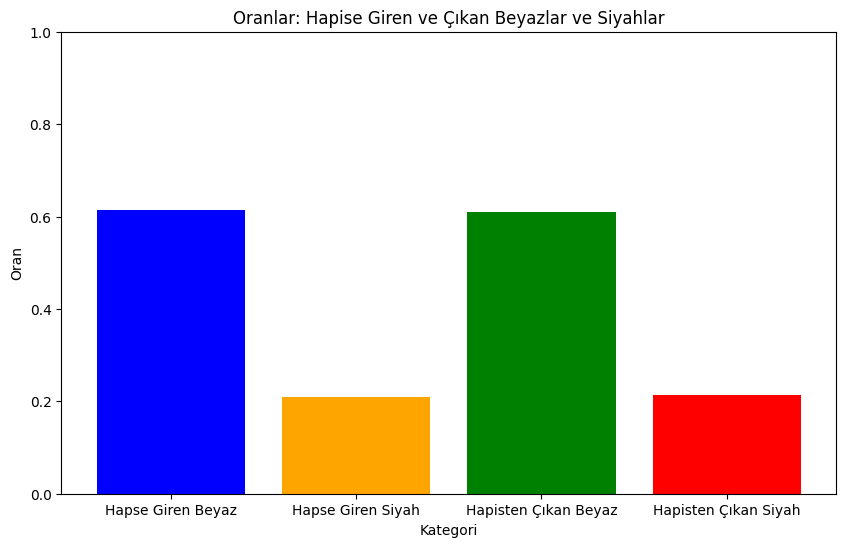

In [27]:
import matplotlib.pyplot as plt
categories = ['Hapse Giren Beyaz', 'Hapse Giren Siyah', 'Hapisten Çıkan Beyaz', 'Hapisten Çıkan Siyah']
ratios = [admissions_white_ratio, admissions_black_ratio, releases_white_ratio, releases_black_ratio]

# Bar Plot
plt.figure(figsize=(10,6))
plt.bar(categories, ratios, color=['blue', 'orange', 'green', 'red'])

# Başlık ve etiketler
plt.title('Oranlar: Hapise Giren ve Çıkan Beyazlar ve Siyahlar')
plt.xlabel('Kategori')
plt.ylabel('Oran')
plt.ylim(0, 1)  # Y eksenini 0 ile 1 arasında tutuyoruz (oranlar)

# Gösterim
plt.show()


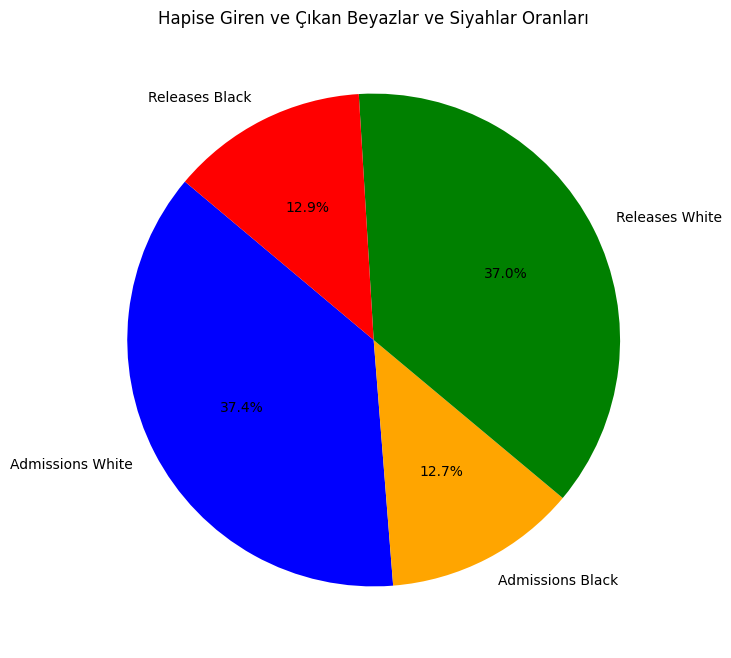

In [28]:
# Oranlar
labels = ['Admissions White', 'Admissions Black', 'Releases White', 'Releases Black']
sizes = [admissions_white_ratio, admissions_black_ratio, releases_white_ratio, releases_black_ratio]
colors = ['blue', 'orange', 'green', 'red']

# Pie Chart
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)

# Başlık
plt.title('Hapise Giren ve Çıkan Beyazlar ve Siyahlar Oranları')

# Gösterim
plt.show()

**Z SKORU YÖNTEMİYLE AYKIRI DEĞER ANALİZİ SONUÇLARI**

In [41]:
mean_values = df_aykiri.mean()
std_values = df_aykiri.std()

In [42]:
z_scores = (df_aykiri - mean_values) / std_values

In [43]:
outliers = (z_scores.abs() > 3)
df_cleaned = df_aykiri[~outliers.any(axis=1)]
df_cleaned



,admissions_total,admissions_white,admissions_black,releases_total,releases_white,releases_black
0,1583,600,193,1649,653,194
1,1580,615,189,1559,644,169
2,1779,706,235,1693,703,206
3,1821,730,260,1659,685,193
4,1689,704,215,1570,651,174
...,...,...,...,...,...,...
1909,3475,812,746,3018,669,785
1910,3126,770,701,2585,571,631
1911,3221,851,699,2673,647,633
1912,2624,611,576,2590,646,560


In [44]:
# Beyaz ve Siyahlar arasında oranlar
admissions_white_ratio = df_cleaned['admissions_white'].sum() / df_cleaned['admissions_total'].sum()
admissions_black_ratio = df_cleaned['admissions_black'].sum() / df_cleaned['admissions_total'].sum()

releases_white_ratio = df_cleaned['releases_white'].sum() / df_cleaned['releases_total'].sum()
releases_black_ratio = df_cleaned['releases_black'].sum() / df_cleaned['releases_total'].sum()

print(f"Admissions White Ratio: {admissions_white_ratio}")
print(f"Admissions Black Ratio: {admissions_black_ratio}")
print(f"Releases White Ratio: {releases_white_ratio}")
print(f"Releases Black Ratio: {releases_black_ratio}")


Admissions White Ratio: 0.5819973229391645
Admissions Black Ratio: 0.22572222549383178
Releases White Ratio: 0.5693141491331836
Releases Black Ratio: 0.23446770078486348


In [45]:
admissions_total = df_cleaned['admissions_total'].sum()
releases_total = df_cleaned['releases_total'].sum()

admissions_white = admissions_total * admissions_white_ratio
admissions_black = admissions_total * admissions_black_ratio
releases_white = releases_total * releases_white_ratio
releases_black = releases_total * releases_black_ratio

# Kontenjans tablosu oluşturma
contingency_table = [
    [admissions_white, admissions_black],  # Girişler
    [releases_white, releases_black]       # Çıkışlar
]

# Chi-Square Testi
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test p-value: {p}")


Chi-Square Test p-value: 8.797523863356935e-85


Z-Skoru hesaplama yöntemine göre de Bu sonuca göre Etnik gruplar ( beyaz ve siyah) ile hapishaneye giriş/çıkış arasında anlamlı bir ilişki vardır.

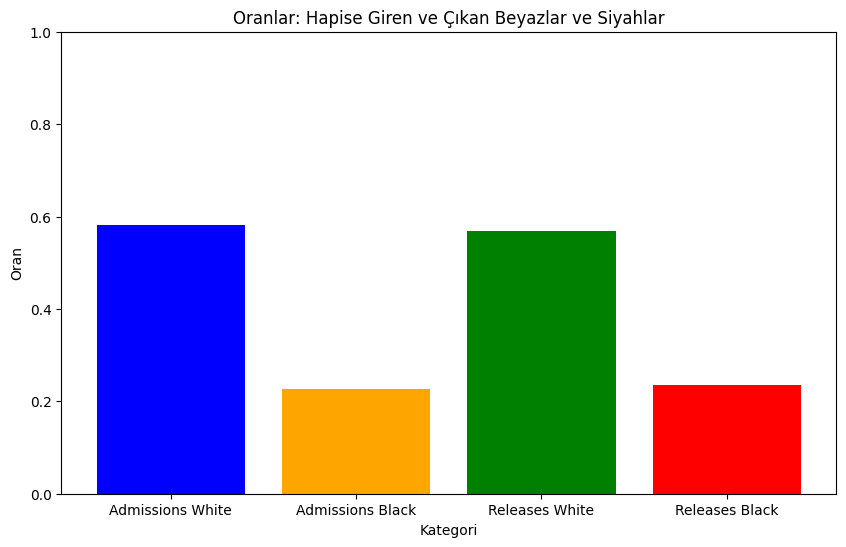

In [46]:


# X ekseni
categories = ['Admissions White', 'Admissions Black', 'Releases White', 'Releases Black']
ratios = [admissions_white_ratio, admissions_black_ratio, releases_white_ratio, releases_black_ratio]

# Bar Plot
plt.figure(figsize=(10,6))
plt.bar(categories, ratios, color=['blue', 'orange', 'green', 'red'])

# Başlık ve etiketler
plt.title('Oranlar: Hapise Giren ve Çıkan Beyazlar ve Siyahlar')
plt.xlabel('Kategori')
plt.ylabel('Oran')
plt.ylim(0, 1)  # Y eksenini 0 ile 1 arasında tutuyoruz (oranlar)

# Gösterim
plt.show()


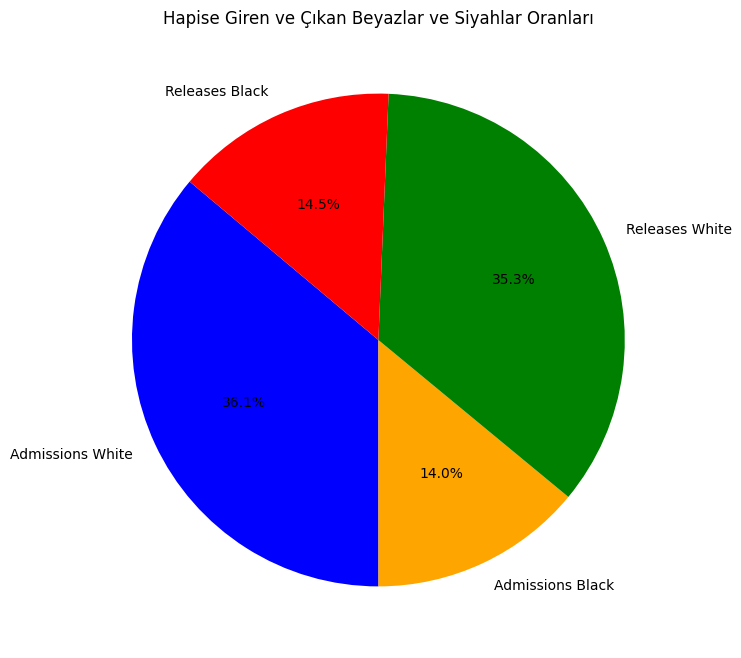

In [47]:
# Oranlar
labels = ['Admissions White', 'Admissions Black', 'Releases White', 'Releases Black']
sizes = [admissions_white_ratio, admissions_black_ratio, releases_white_ratio, releases_black_ratio]
colors = ['blue', 'orange', 'green', 'red']

# Pie Chart
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)

# Başlık
plt.title('Hapise Giren ve Çıkan Beyazlar ve Siyahlar Oranları')

# Gösterim
plt.show()
